 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import csv
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_path = Path("../Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_path = Path("../Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_path = Path("../Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types

sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Remove $ from column
sp500_df["Close"]= sp500_df["Close"].str.replace("$", "", regex=True)
sp500_df["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [12]:
sp500_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_df["Close"] = pd.to_numeric(sp500_df["Close"], errors="coerce")
sp500_df["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [14]:
# Check data type to ensure object to float
sp500_df.dtypes

Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
sp500df_daily_returns = sp500_df.pct_change()
sp500df_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Count nulls
sp500df_daily_returns.isnull().sum()


Close    1
dtype: int64

In [17]:
# Drop nulls
sp500df_daily_returns.dropna(inplace=True)
sp500df_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["SP500"]
sp500df_daily_returns.columns = columns
sp500df_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_whale_algo_sp500 = pd.concat([whale_df, algo_df, sp500df_daily_returns], axis="columns", join="inner")
combined_whale_algo_sp500.sort_index
combined_whale_algo_sp500.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Combined Daily Returns'}, xlabel='Date'>

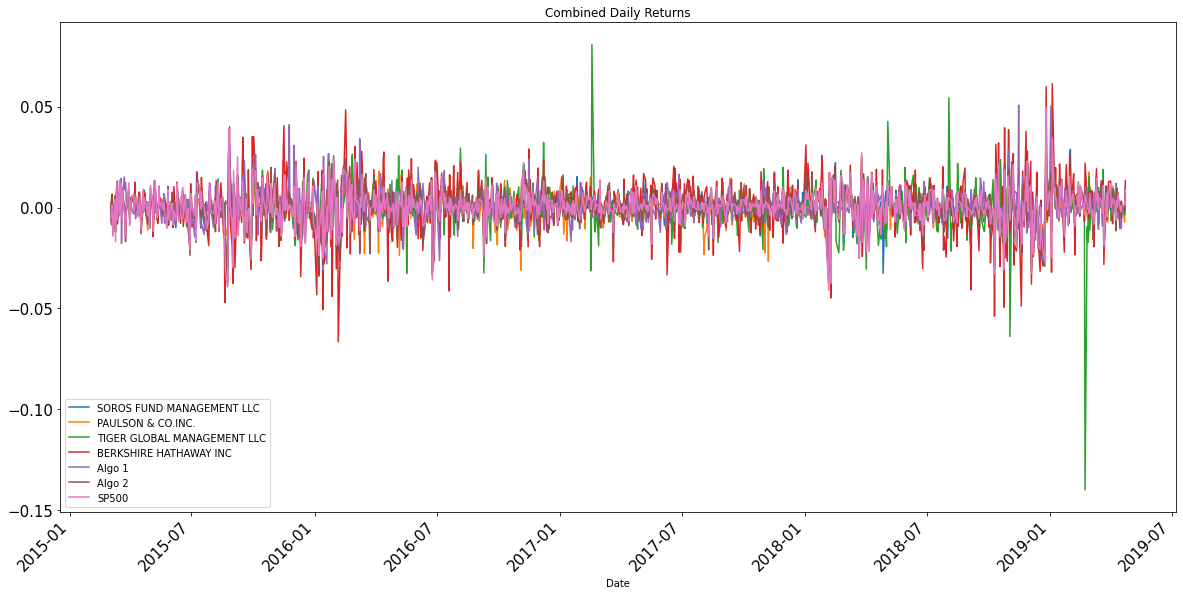

In [20]:
# Plot daily returns of all portfolios
all_portfolios_daily_returns = combined_whale_algo_sp500.plot(figsize=(20,10), title="Combined Daily Returns", rot=45, fontsize=15)
all_portfolios_daily_returns

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Combined Portfolios'}, xlabel='Date'>

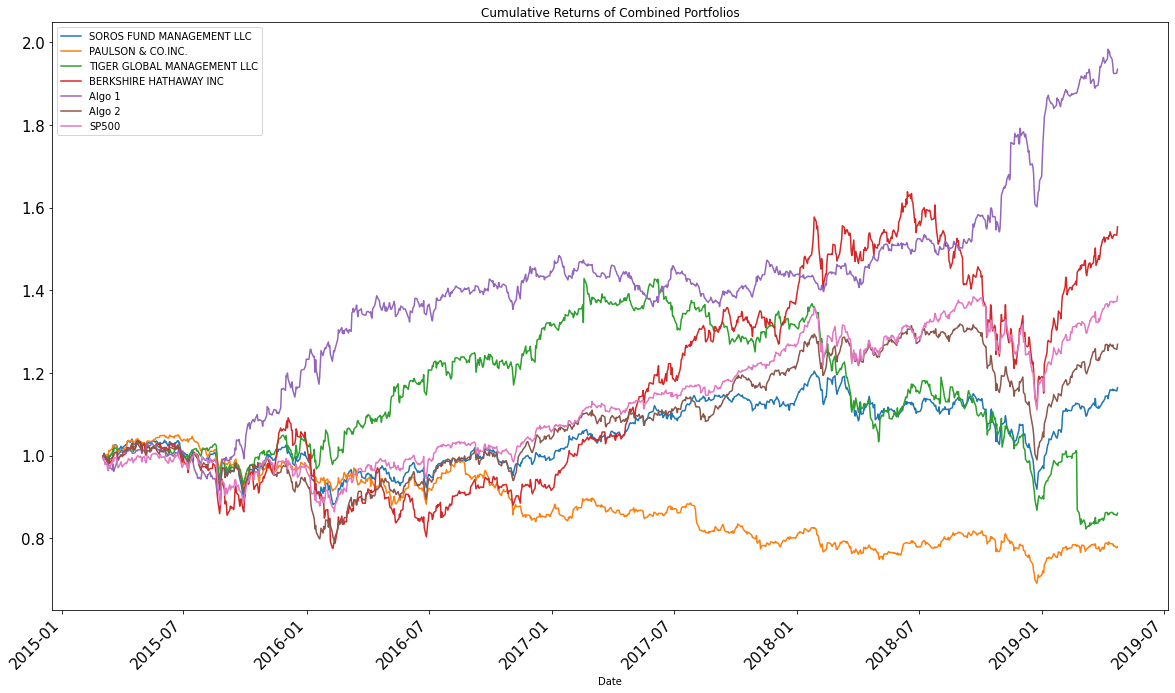

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_whale_algo_sp500).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,12), title="Cumulative Returns of Combined Portfolios", rot=45, fontsize=15)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

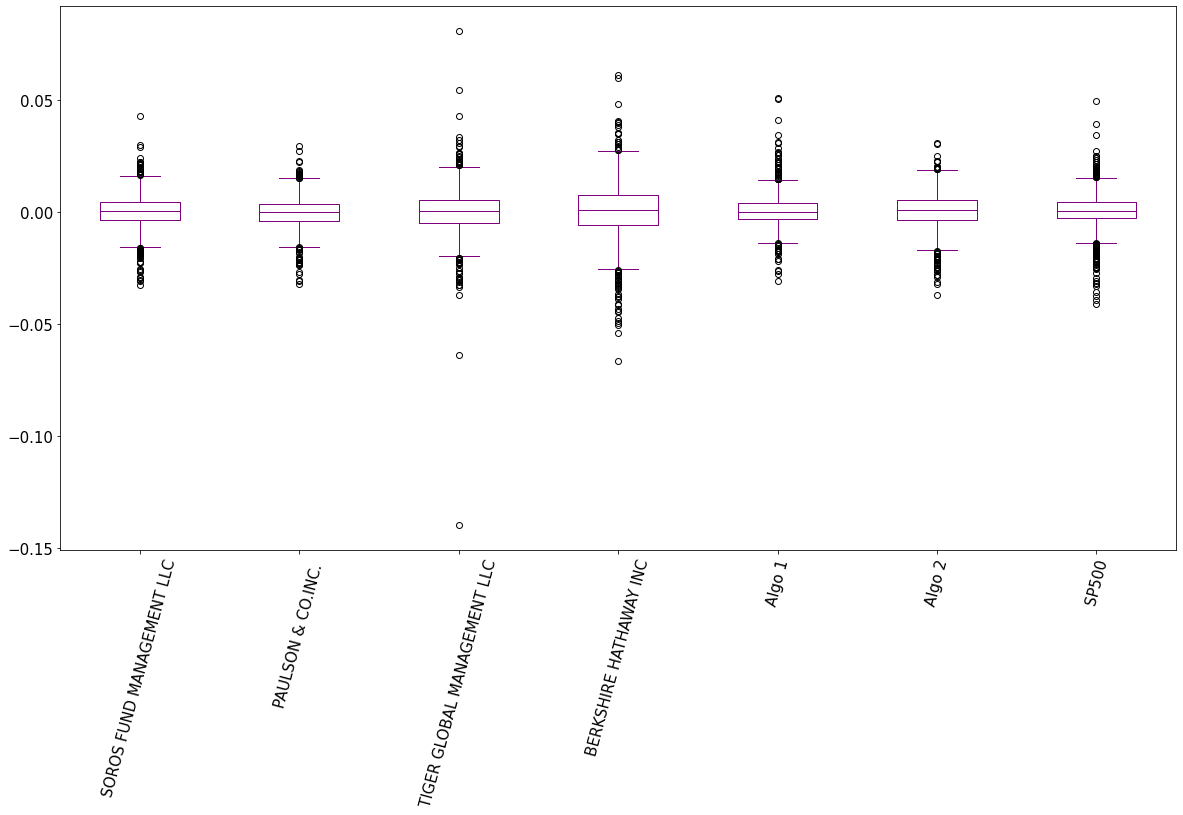

In [22]:
# Box plot to visually show risk
combined_whale_algo_sp500.boxplot(figsize=(20,10), grid=False, rot=75, fontsize=15, color="purple")

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
combined_whale_algo_sp500.std

<bound method NDFrame._add_numeric_operations.<locals>.std of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                               

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate  the daily standard deviation of S&P 500
sp500df_daily_returns.std()


SP500    0.008111
dtype: float64

In [25]:
# Determine which portfolios are riskier than the S&P 500
volatility = combined_whale_algo_sp500.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_whale_algo_sp500.groupby(combined_whale_algo_sp500.index.year).std()
annualized_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015,0.007922,0.005959,0.008443,0.012681,0.008920,0.008651,0.009936
2016,0.007988,0.008246,0.010295,0.014039,0.008366,0.009676,0.008249
2017,0.004942,0.005935,0.008290,0.008566,0.005220,0.005431,0.004212
2018,0.009965,0.007484,0.012484,0.015265,0.007548,0.009056,0.010742
2019,0.007434,0.007104,0.018166,0.012797,0.007980,0.007811,0.007835


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation For All Portfolios using a 21-Day Window'}, xlabel='Date'>

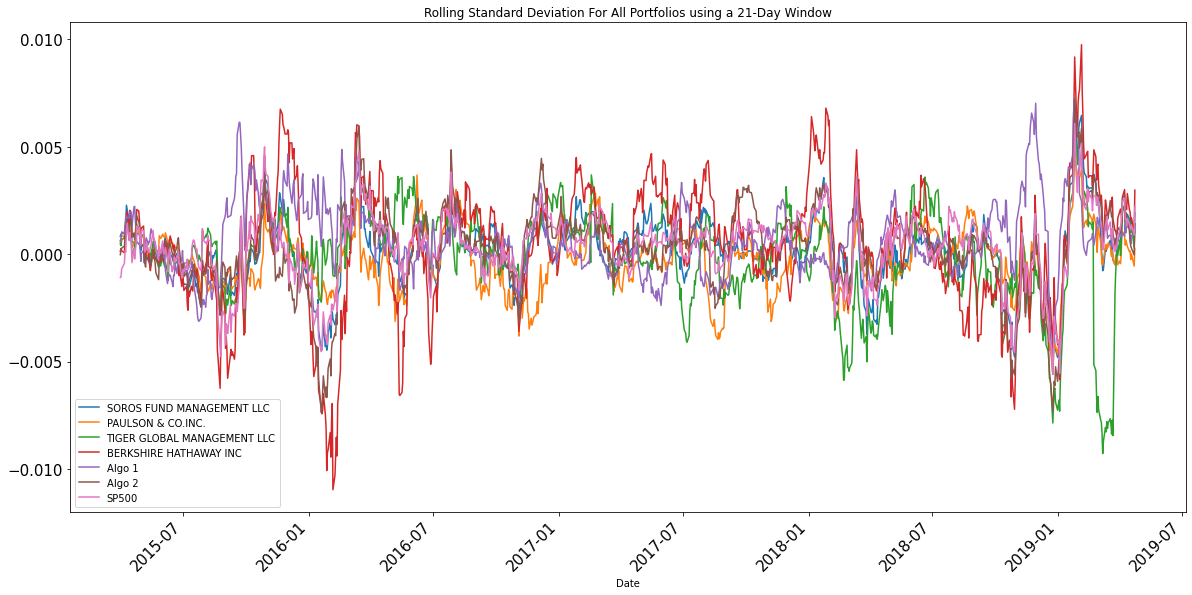

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_combined = combined_whale_algo_sp500.rolling(window=21).mean()

# Plot the rolling standard deviation
rolling_combined.plot(figsize=(20,10), title="Rolling Standard Deviation For All Portfolios using a 21-Day Window", rot=45, fontsize=15)

### Calculate and plot the correlation

<AxesSubplot:>

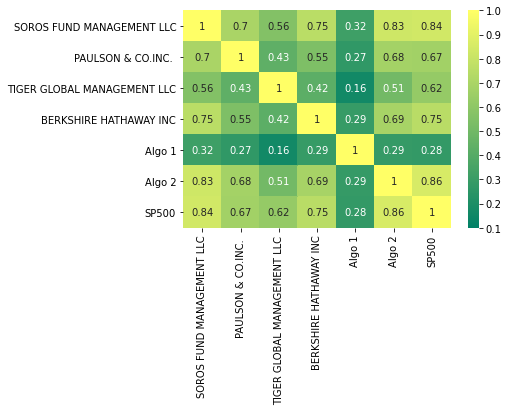

In [28]:
# Calculate the correlation
correlation = combined_whale_algo_sp500.corr()
correlation
# Display de correlation matrix
correlation_plot = sns.heatmap(correlation, vmin=0.1, vmax=1, annot=True, cmap="summer")
correlation_plot

In [65]:
# Alternatively, sum total correlation for each stock
correlation.sum().sort_values()

Algo 1                         2.614209
TIGER GLOBAL MANAGEMENT LLC    3.715893
PAULSON & CO.INC.              4.296740
BERKSHIRE HATHAWAY INC         4.455893
Algo 2                         4.847528
SOROS FUND MANAGEMENT LLC      5.001465
SP500                          5.021171
dtype: float64

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [30]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_whale_algo_sp500["Algo 1"].cov(combined_whale_algo_sp500["SP500"])
algo1_covariance

1.821774999163274e-05

In [31]:
# Calculate variance of S&P 500
variance = combined_whale_algo_sp500["SP500"].var()
variance

7.316632424648712e-05

In [32]:
# Computing beta
algo1_beta = algo1_covariance / variance
algo1_beta

0.24899091459425635

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date', ylabel='60-Day Beta'>

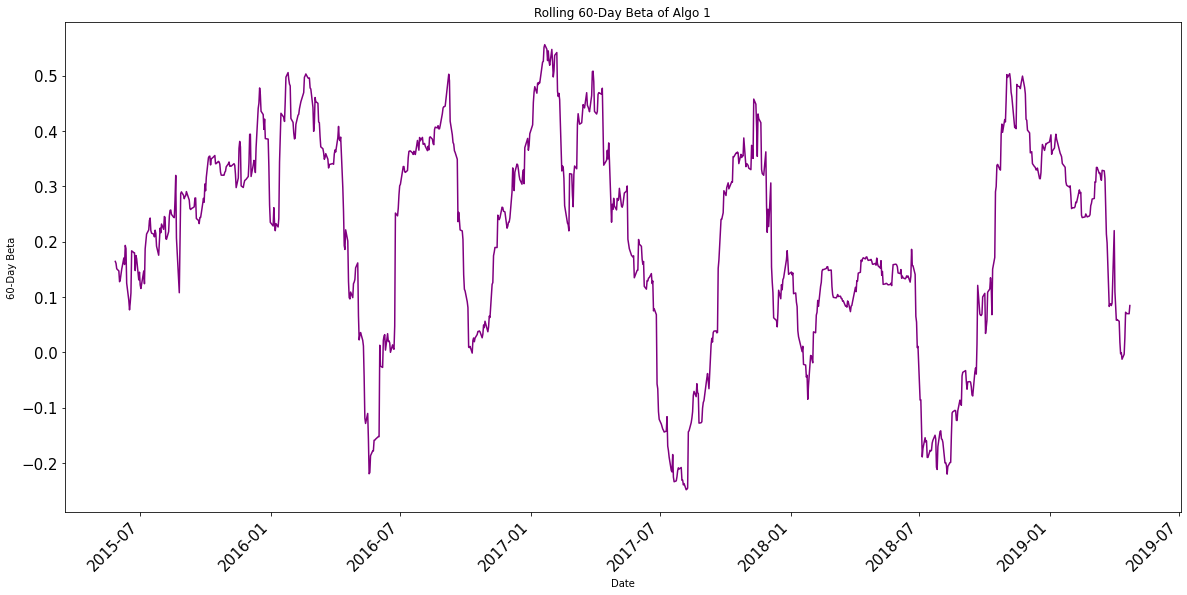

In [33]:
#Plot beta trend
#Calculate and plot the 60-day rolling beta between Algo 1 and the S&P 500

#Calculate 60-day rolling covariance of Algo1 vs SP500 and plot the data
rolling_algo1_cov = combined_whale_algo_sp500["Algo 1"].rolling(window=60).cov(combined_whale_algo_sp500["SP500"])

#Calculate 60-day rolling variance of SP500
rolling_sp500_var = combined_whale_algo_sp500["SP500"].rolling(window=60).var()

#Calculate 60-day rolling beta of Algo1 
rolling_algo1_beta = rolling_algo1_cov / rolling_sp500_var

#Plot 60-day rolling beta of Algo1
rolling_algo1_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of Algo 1", fontsize=15, rot=45, xlabel="Date", ylabel="60-Day Beta", color="purple")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [34]:
# Use `ewm` (exponentially weighted moving average) to calculate the 21-day rolling window 
ewma_df = combined_whale_algo_sp500.ewm(halflife=21).mean()
ewma_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,0.001352
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,0.001234
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,0.001246


<AxesSubplot:title={'center':'21-Day Exponentially Weighted Moving Average'}, xlabel='Date', ylabel='21-Day EWM'>

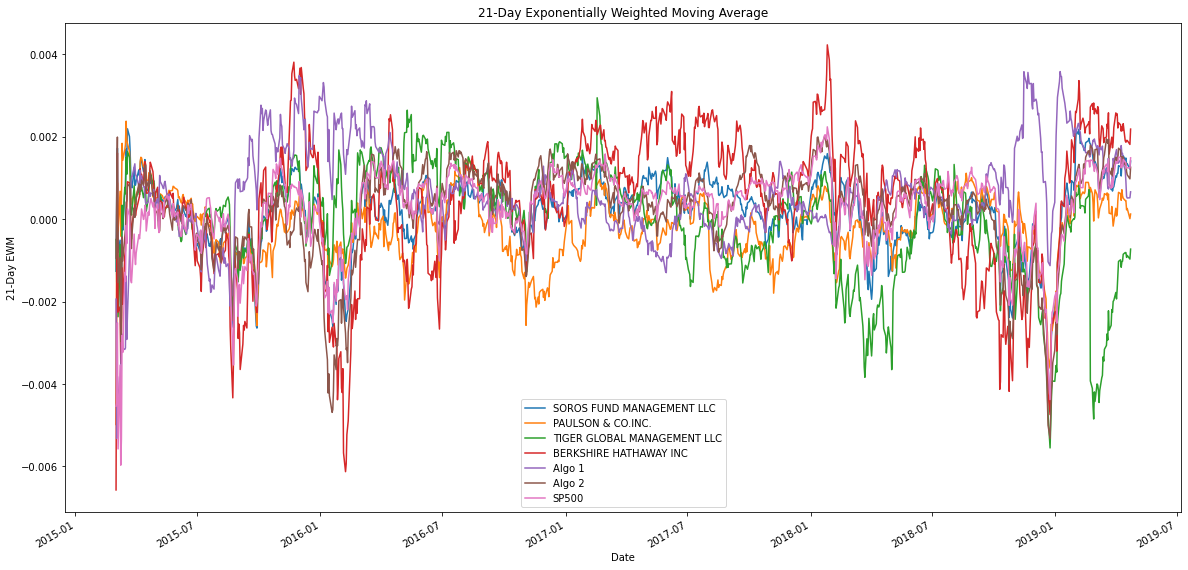

In [35]:
#Visualize EWM
plot_ewm_df = combined_whale_algo_sp500.ewm(halflife=21).mean().plot(figsize=(20,10), title="21-Day Exponentially Weighted Moving Average", xlabel="Date", ylabel="21-Day EWM")
plot_ewm_df

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_whale_algo_sp500.mean() * 252) / (combined_whale_algo_sp500.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
SP500                          0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Portfolio Performance'}, xlabel='Portfolios', ylabel='Sharpe Ratio'>

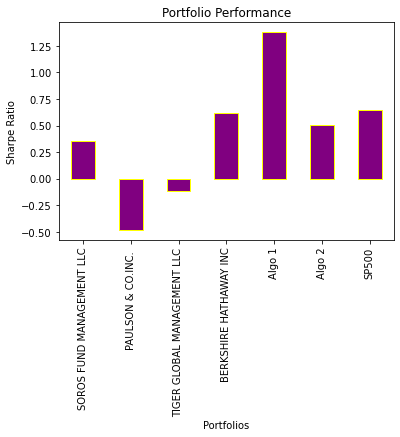

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", ylabel="Sharpe Ratio", xlabel="Portfolios", color="purple", edgecolor="yellow", title="Portfolio Performance")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

From the bar chart, Algo 1 outperforms, but Algo 2 does not. Algo 1 has a sharpe ratio of 1.38 which shows a high degree of expected return for relatively low amount of risk. Algo 2 has a lower sharpe ratio than the S&P 500. However, it fares better than most of the whales portfolio with the exception of Berkshire Hathaway Inc which has a slightly higher sharpe ratio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

I fetched data from four companies.

* `AMZN` - [Amazon](https://en.wikipedia.org/wiki/Amazon_(company))

* `CMG` - [Chipotle Mexican Grill](https://en.wikipedia.org/wiki/Chipotle_Mexican_Grill)

* `INTC` - [Intel Corp](https://en.wikipedia.org/wiki/Intel)

* `COST` - [Costco](https://en.wikipedia.org/wiki/Costco)

* `TSLA` -[Tesl, Inc.](https://en.wikipedia.org/wiki/Tesla,_Inc.)


In [38]:
# Reading data from 1st stock (Amazon)
amzn_path = Path("../Resources/amzn_historical.csv")
amzn_df = pd.read_csv(amzn_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
amzn_df.sort_index(inplace=True)
amzn_df.head()

,Close
Date,
2015-03-02 16:00:00,385.66
2015-03-03 16:00:00,384.61
2015-03-04 16:00:00,382.72
2015-03-05 16:00:00,387.83
2015-03-06 16:00:00,380.09


In [39]:
# Reading data from 2nd stock (Chipotle)
cmg_path = Path("../Resources/cmg_historical.csv")
cmg_df = pd.read_csv(cmg_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
cmg_df.sort_index(inplace=True)
cmg_df.head()

,Close
Date,
2018-03-02 16:00:00,319.99
2018-03-05 16:00:00,320.16
2018-03-06 16:00:00,318.04
2018-03-07 16:00:00,319.95
2018-03-08 16:00:00,321.86


In [40]:
# Reading data from 3rd stock (Intel Corp)
intc_path = Path("../Resources/intc_historical.csv")
intc_df = pd.read_csv(intc_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
intc_df.sort_index(inplace=True)
intc_df.head()

,Close
Date,
2018-03-02 16:00:00,48.98
2018-03-05 16:00:00,49.75
2018-03-06 16:00:00,50.71
2018-03-07 16:00:00,51.32
2018-03-08 16:00:00,50.74


In [41]:
# Reading data from 4th stock (Costco)
costco_path = Path("../Resources/costco_historical.csv")
costco_df = pd.read_csv(costco_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
costco_df.sort_index(inplace=True)
costco_df.head()

,Close
Date,
2018-03-02 16:00:00,189.33
2018-03-05 16:00:00,191.48
2018-03-06 16:00:00,191.46
2018-03-07 16:00:00,187.36
2018-03-08 16:00:00,185.69


In [42]:
# Reading data from 5th stock (Tesla)
tsla_path = Path("../Resources/tsla_historical.csv")
tsla_df = pd.read_csv(tsla_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_df.sort_index(inplace=True)
tsla_df.head()

,Close
Date,
2018-03-02 16:00:00,67.02
2018-03-05 16:00:00,66.67
2018-03-06 16:00:00,65.64
2018-03-07 16:00:00,66.46
2018-03-08 16:00:00,65.82


In [43]:
# Combine all stocks in a single DataFrame
combined_new_df = pd.concat([amzn_df, cmg_df, intc_df, costco_df, tsla_df], axis="columns", join="inner")
combined_new_df.sort_index
combined_new_df.head()

,Close,Close,Close,Close,Close
Date,,,,,
2018-03-02 16:00:00,1500.25,319.99,48.98,189.33,67.02
2018-03-05 16:00:00,1523.61,320.16,49.75,191.48,66.67
2018-03-06 16:00:00,1537.64,318.04,50.71,191.46,65.64
2018-03-07 16:00:00,1545.00,319.95,51.32,187.36,66.46
2018-03-08 16:00:00,1551.86,321.86,50.74,185.69,65.82


In [44]:
#Rename colums
columns = ["amzn", "cmg", "intc", "cost", "tsla"]
combined_new_df.columns = columns
combined_new_df.head()

,amzn,cmg,intc,cost,tsla
Date,,,,,
2018-03-02 16:00:00,1500.25,319.99,48.98,189.33,67.02
2018-03-05 16:00:00,1523.61,320.16,49.75,191.48,66.67
2018-03-06 16:00:00,1537.64,318.04,50.71,191.46,65.64
2018-03-07 16:00:00,1545.00,319.95,51.32,187.36,66.46
2018-03-08 16:00:00,1551.86,321.86,50.74,185.69,65.82


In [45]:
# Reset Date index. Drop time from index
combined_new_df.index = combined_new_df.index.normalize()
combined_new_df.index

DatetimeIndex(['2018-03-02', '2018-03-05', '2018-03-06', '2018-03-07',
               '2018-03-08', '2018-03-09', '2018-03-12', '2018-03-13',
               '2018-03-14', '2018-03-15',
               ...
               '2021-09-10', '2021-09-13', '2021-09-14', '2021-09-15',
               '2021-09-16', '2021-09-17', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23'],
              dtype='datetime64[ns]', name='Date', length=898, freq=None)

In [46]:
# Reorganize portfolio data by having a column per symbol
combined_new_df.head()

,amzn,cmg,intc,cost,tsla
Date,,,,,
2018-03-02,1500.25,319.99,48.98,189.33,67.02
2018-03-05,1523.61,320.16,49.75,191.48,66.67
2018-03-06,1537.64,318.04,50.71,191.46,65.64
2018-03-07,1545.00,319.95,51.32,187.36,66.46
2018-03-08,1551.86,321.86,50.74,185.69,65.82


In [47]:
# Calculate daily returns
combined_new_df_daily_returns = combined_new_df.pct_change()
# Drop NAs
combined_new_df_daily_returns.isnull().sum()
combined_new_df_daily_returns.dropna(inplace=True)
# Display sample data
combined_new_df_daily_returns.head()


,amzn,cmg,intc,cost,tsla
Date,,,,,
2018-03-05,0.015571,0.000531,0.015721,0.011356,-0.005222
2018-03-06,0.009208,-0.006622,0.019296,-0.000104,-0.015449
2018-03-07,0.004787,0.006006,0.012029,-0.021414,0.012492
2018-03-08,0.004440,0.005970,-0.011302,-0.008913,-0.009630
2018-03-09,0.017418,0.000932,0.028577,0.015564,-0.005925


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Weighted returns
weighted_portfolio_returns = combined_new_df_daily_returns

# Calculate portfolio return
portfolio_returns = weighted_portfolio_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-03-05    0.007591
2018-03-06    0.001266
2018-03-07    0.002780
2018-03-08   -0.003887
2018-03-09    0.011313
dtype: float64

In [49]:
# Rename portfolio
portfolio_returns = portfolio_returns.rename("My BIG PAPER Portfolio")
portfolio_returns.head()

Date
2018-03-05    0.007591
2018-03-06    0.001266
2018-03-07    0.002780
2018-03-08   -0.003887
2018-03-09    0.011313
Name: My BIG PAPER Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_returns = pd.concat([portfolio_returns, combined_whale_algo_sp500], axis="columns", join="inner")
all_portfolios_returns.head()

,My BIG PAPER Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2018-03-05,0.007591,0.011059,0.009997,0.005790,0.007932,-0.000021,0.008181,0.011032
2018-03-06,0.001266,0.002314,0.007759,0.003531,0.008665,-0.001750,0.005611,0.002639
2018-03-07,0.002780,0.003181,-0.001637,-0.002510,0.007710,-0.002392,0.005220,-0.000484
2018-03-08,-0.003887,0.003683,0.000106,0.003420,0.007168,0.003884,0.003402,0.004463
2018-03-09,0.011313,0.008935,0.004583,0.006096,0.020986,0.000631,0.012336,0.017379


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_returns.isnull().sum()

My BIG PAPER Portfolio         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`

combined_annualized_std = all_portfolios_returns.groupby(all_portfolios_returns.index.year).std()
combined_annualized_std.head()

,My BIG PAPER Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2018,0.016664,0.010002,0.007375,0.012675,0.015380,0.007999,0.008739,0.010400
2019,0.011594,0.007434,0.007104,0.018166,0.012797,0.007980,0.007811,0.007835


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

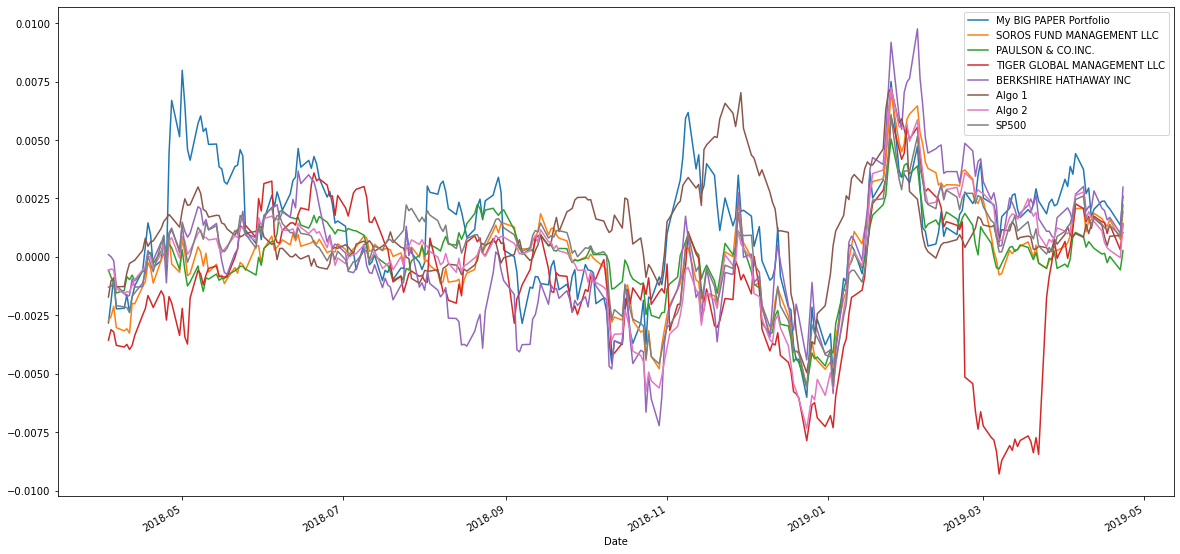

In [53]:
# Calculate rolling standard deviation
all_rolling_combined_df = all_portfolios_returns.rolling(window=21).mean()

# Plot rolling standard deviation
all_rolling_combined_df.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

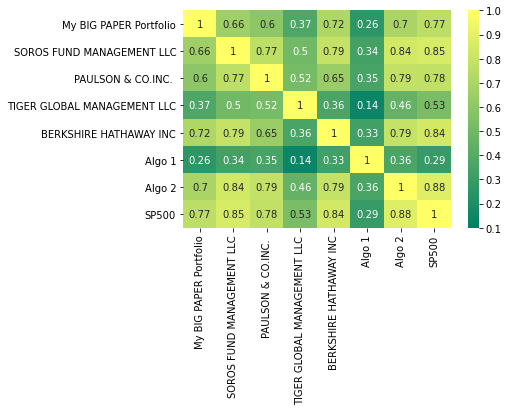

In [54]:
# Calculate and plot the correlation
all_correlations = all_portfolios_returns.corr()
all_correlations_plot = sns.heatmap(all_correlations, vmin=0.1, vmax=1, cmap="summer", annot=True)
all_correlations_plot

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My BIG PAPER Portfolio compared to S&P 500'}, xlabel='Date', ylabel='Rolling 60-Day Beta'>

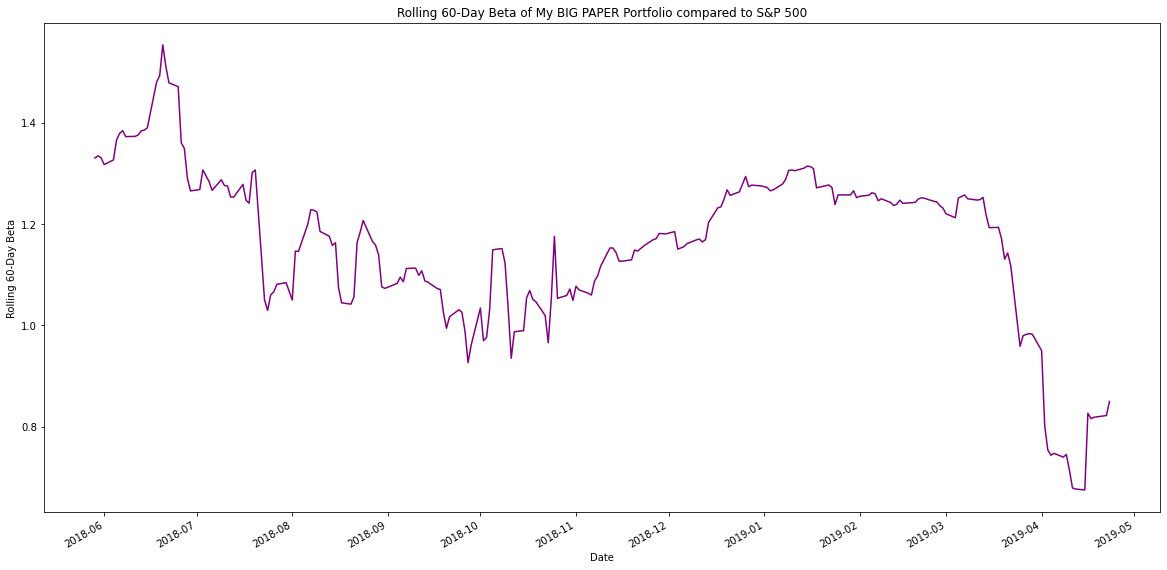

In [55]:
# Calculate and plot Beta (covariance / variance)
portfolio_covariance = all_portfolios_returns["My BIG PAPER Portfolio"].rolling(window=60).cov(all_portfolios_returns["SP500"])
portfolio_covariance

all_variance = all_portfolios_returns["SP500"].rolling(window=60).var()
all_variance

rolling_60day_beta = portfolio_covariance / all_variance
rolling_60day_beta

rolling_60day_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of My BIG PAPER Portfolio compared to S&P 500", xlabel="Date", ylabel="Rolling 60-Day Beta", color="purple")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Calculate Annualzied Sharpe Ratios
new_sharpe_ratios = (all_portfolios_returns.mean() * 252) / (all_portfolios_returns.std() * np.sqrt(252))
new_sharpe_ratios.sort_values(ascending=False)

Algo 1                         2.024290
My BIG PAPER Portfolio         1.188781
SP500                          0.565355
BERKSHIRE HATHAWAY INC         0.306637
Algo 2                         0.214336
SOROS FUND MANAGEMENT LLC      0.121969
PAULSON & CO.INC.              0.089141
TIGER GLOBAL MANAGEMENT LLC   -1.167097
dtype: float64

<AxesSubplot:title={'center':'Portfolio Performance'}, xlabel='Portfolios', ylabel='Sharpe Ratio'>

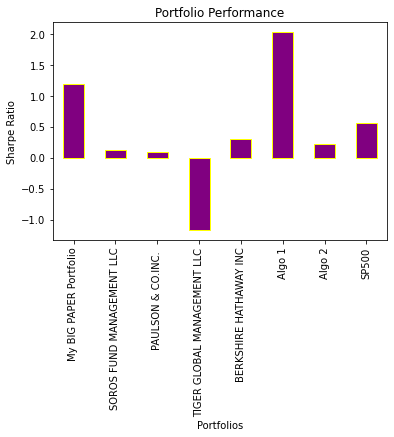

In [57]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind="bar", title="Portfolio Performance", xlabel="Portfolios", ylabel="Sharpe Ratio", color="purple", edgecolor="yellow")

### How does your portfolio do?

My BIG PAPER Portfolio does really well with a Sharpe Ratio of 1.19. This suggests that the portfolio is offering excess returns relative to its volatility. The Algo1 portfolio does splendidly compared to all other portfolios with a Sharpe Ratio of 2.02.